In [1]:
import numpy as np 
import matplotlib.pyplot as plt
# Retina display
%config InlineBackend.figure_format = 'retina'
from latexify import latexify, format_axes

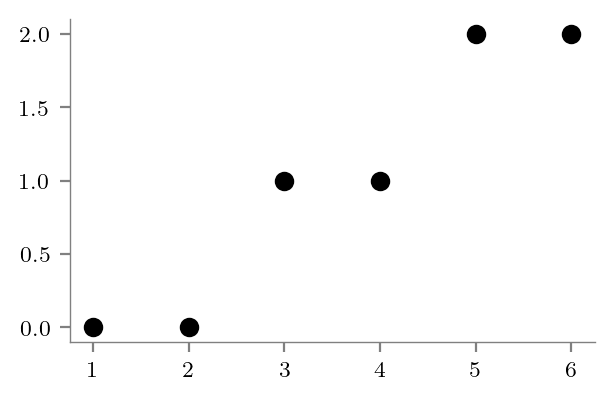

In [6]:
# Create dataset
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0, 0, 1, 1, 2, 2])

# plot data
latexify()
plt.scatter(x, y, color='k')
format_axes(plt.gca()) 
plt.savefig("../figures/decision-trees/ri-ro-dataset.pdf")

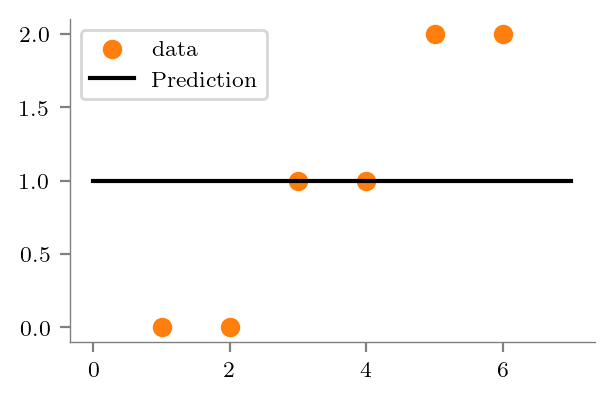

In [22]:
# Depth 0 tree
# Average of all y values
y_pred = np.mean(y)
# Plot data
latexify()
plt.scatter(x, y, color='C1', label='data')
# Plot prediction
plt.plot([0, 7], [y_pred, y_pred], color='k', linestyle='-', label='Prediction')
format_axes(plt.gca())
plt.legend()
plt.savefig("../figures/decision-trees/ri-ro-depth-0.pdf")

In [ ]:
# Depth 1 tree

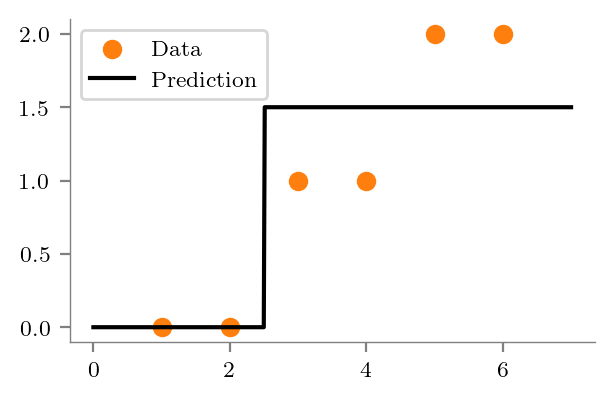

In [32]:
# getting the same via sklearn
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(x.reshape(-1, 1), y)
y_pred = dt.predict(x.reshape(-1, 1))

# Plot data
latexify()
plt.scatter(x, y, color='C1', label='Data')


x_test = np.linspace(0, 7, 500)
y_test = dt.predict(x_test.reshape(-1, 1))
plt.plot(x_test, y_test, color='k', label='Prediction')
format_axes(plt.gca())
plt.legend()
plt.savefig("../figures/decision-trees/ri-ro-depth-1.pdf")

In [33]:
# Plot tree using sklearn export
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(dt, out_file=None, feature_names=['x'], filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("../figures/decision-trees/ri-ro-depth-1-sklearn")

'../figures/decision-trees/ri-ro-depth-1-sklearn.pdf'

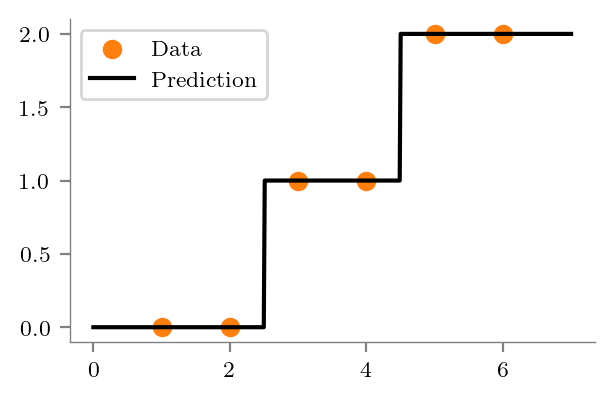

In [36]:
# Depth 2 tree
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(x.reshape(-1, 1), y)

# Plot data
latexify()
plt.scatter(x, y, color='C1', label='Data')
# Plot decision boundary

x_test = np.linspace(0, 7, 500)
y_test = dt.predict(x_test.reshape(-1, 1))
plt.plot(x_test, y_test, color='k', label='Prediction')
format_axes(plt.gca())
plt.legend()
plt.savefig("../figures/decision-trees/ri-ro-depth-2.pdf")

In [35]:
# Plot dt
dot_data = export_graphviz(dt, out_file=None, feature_names=['x'], filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("../figures/decision-trees/ri-ro-depth-2-sklearn")

'../figures/decision-trees/ri-ro-depth-2-sklearn.pdf'

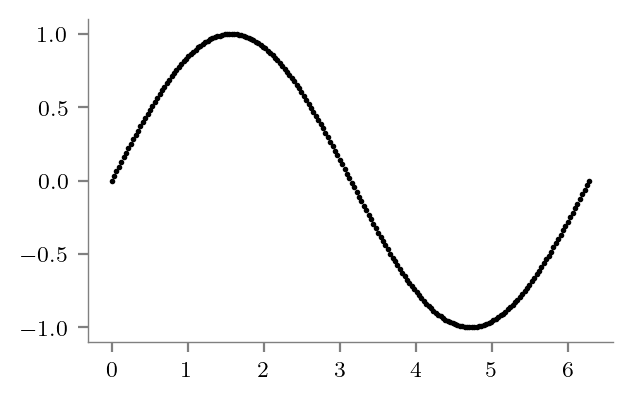

In [39]:
### Sine daatset
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

# Plot data
latexify()
plt.scatter(x, y, color='k', s=1)
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/sine-dataset.pdf")

In [40]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(x.reshape(-1, 1), y)

dot_data = export_graphviz(dt, out_file=None, feature_names=['x'], filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("../figures/decision-trees/sine-depth-1-sklearn")

'../figures/decision-trees/sine-depth-1-sklearn.pdf'

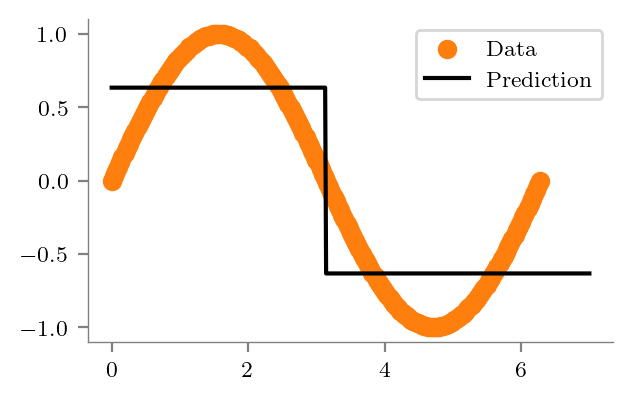

In [42]:
latexify()
plt.scatter(x, y, color='C1', label='Data')
# Plot decision boundary

x_test = np.linspace(0, 7, 500)
y_test = dt.predict(x_test.reshape(-1, 1))
plt.plot(x_test, y_test, color='k', label='Prediction')
format_axes(plt.gca())
plt.legend()
plt.savefig("../figures/decision-trees/sine-depth-1.pdf")

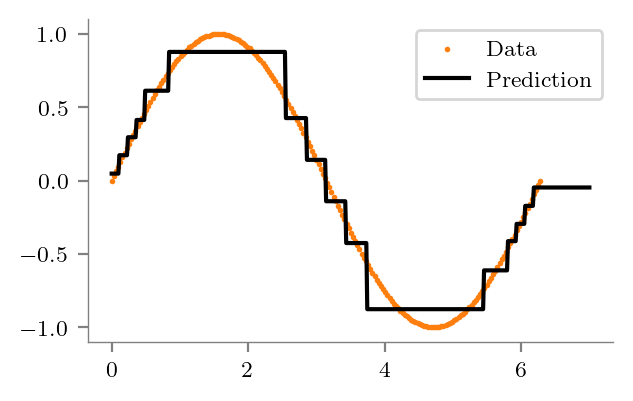

In [49]:
dt = DecisionTreeRegressor(max_depth=4)

plt.scatter(x, y, color='C1', label='Data',s=1)

dt.fit(x.reshape(-1, 1), y)
y_test = dt.predict(x_test.reshape(-1, 1))
plt.plot(x_test, y_test, color='k', label='Prediction')
format_axes(plt.gca())
plt.legend()
plt.savefig("../figures/decision-trees/sine-depth-4.pdf")


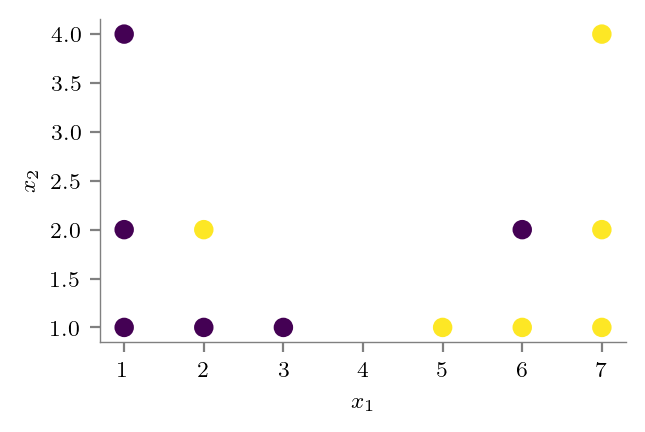

In [53]:
### Dataset for showing bias-variance tradeoff

# Create dataset
X = np.array([
    [1, 1],
    [2, 1],
    [3, 1],
    [5, 1],
    [6, 1],
    [7, 1],
    [1, 2],
    [2, 2],
    [6, 2],
    [7, 2],
    [1, 4],
    [7, 4] 
])

y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1 ,0, 1])

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-dataset.pdf")

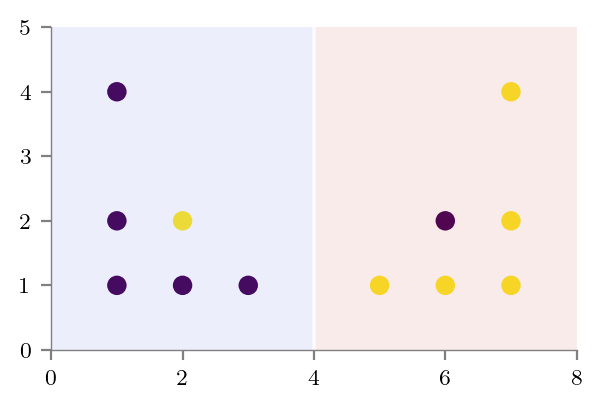

In [56]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X, y)

# Predict in entire 2d space and contour plot
x1 = np.linspace(0, 8, 100)
x2 = np.linspace(0, 5, 100)

X1, X2 = np.meshgrid(x1, x2)
X_test = np.stack([X1.flatten(), X2.flatten()], axis=1)
y_test = dt.predict(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(X1, X2, y_test.reshape(X1.shape), alpha=0.1, cmap='coolwarm')
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-depth-1.pdf")

In [57]:
# Now, plot the dt via sklearn export
dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("../figures/decision-trees/bias-variance-depth-1-sklearn")

'../figures/decision-trees/bias-variance-depth-1-sklearn.pdf'

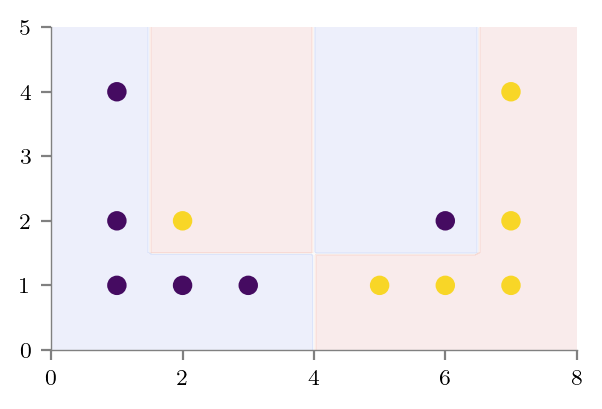

In [58]:
# No depth limit
dt = DecisionTreeRegressor()
dt.fit(X, y)

# Predict in entire 2d space and contour plot
y_test = dt.predict(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(X1, X2, y_test.reshape(X1.shape), alpha=0.1, cmap='coolwarm')
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-full-depth.pdf")


In [59]:
# export tree 
dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("../figures/decision-trees/bias-variance-full-depth-sklearn")

'../figures/decision-trees/bias-variance-full-depth-sklearn.pdf'

In [70]:
# Bias variance dataset 2
# X is all integers from (1, 1) to (6, 6)

X = np.array([[i, j] for i in range(1, 7) for j in range(1, 7)])

In [72]:
y = np.zeros(len(X), dtype=int)

y[(2 <= X[:, 0]) & (X[:, 0] <= 5) & (2 <= X[:, 1]) & (X[:, 1] <= 5)] = 1


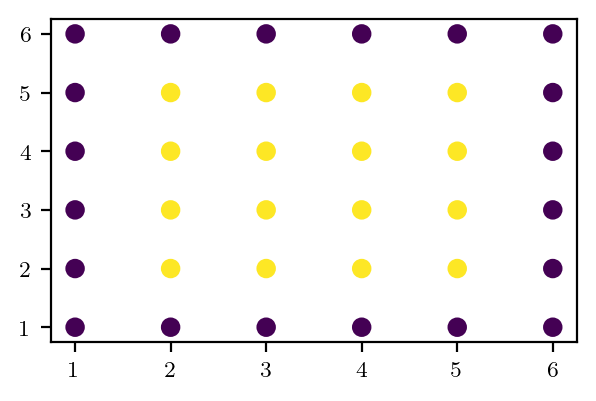

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=y)

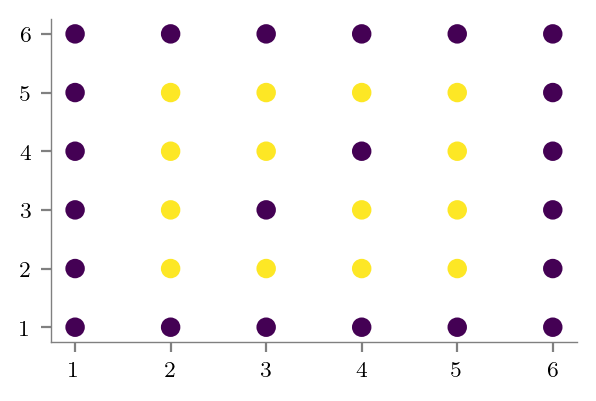

In [75]:
special_condition = (X[:, 0] == 3) & (X[:, 1] == 3) | (X[:, 0] == 4) & (X[:, 1] == 4)
y[special_condition] = 0


plt.scatter(X[:, 0], X[:, 1], c=y) 
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-dataset-2.pdf")

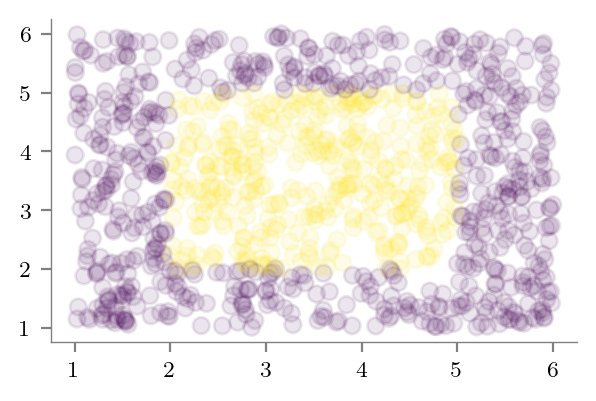

In [83]:
# X_test random uniform frmo (1, 1) to (6, 6) of size 1000
X_test = np.random.uniform(1, 6, size=(1000, 2))
y_test = np.zeros(len(X_test), dtype=int)

y_test[(2 <= X_test[:, 0]) & (X_test[:, 0] <= 5) & (2 <= X_test[:, 1]) & (X_test[:, 1] <= 5)] = 1
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.1)
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-dataset-2-test.pdf")

'../figures/decision-trees/bias-variance-depth-2-sklearn.pdf'

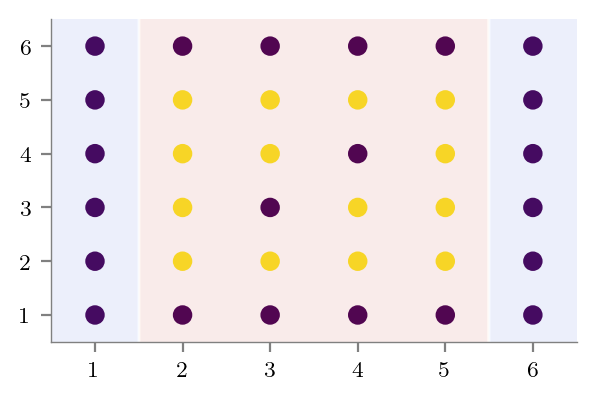

In [89]:
# Underfitting
# Depth-1 tree
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X, y)


# Predict in entire 2d space and contour plot
x1 = np.linspace(0.5, 6.5, 100)
x2 = np.linspace(0.5, 6.5, 100)
# Contour plot
X1, X2 = np.meshgrid(x1, x2)
X_contour = np.stack([X1.flatten(), X2.flatten()], axis=1)

y_contour = dt.predict(X_contour)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(X1, X2, y_contour.reshape(X1.shape), alpha=0.1, cmap='coolwarm')
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-depth-2.pdf")

# Export tree
dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("../figures/decision-trees/bias-variance-depth-2-sklearn")

'../figures/decision-trees/bias-variance-full-depth-sklearn.pdf'

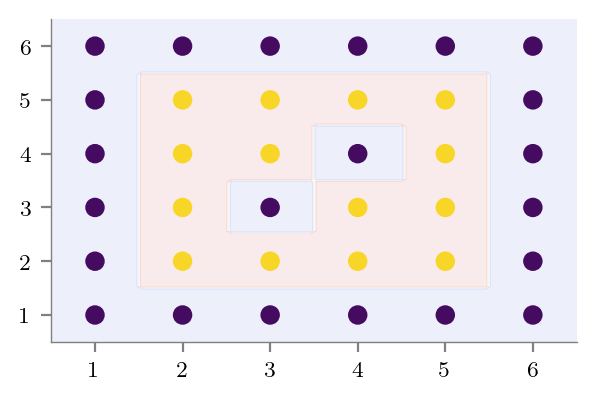

In [91]:
# Overfitting
dt = DecisionTreeRegressor()
dt.fit(X, y)

# Predict in entire 2d space and contour plot
y_contour = dt.predict(X_contour)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(X1, X2, y_contour.reshape(X1.shape), alpha=0.1, cmap='coolwarm')
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/bias-variance-full-depth.pdf")

# Export tree
dot_data = export_graphviz(dt, out_file=None, feature_names=['x1', 'x2'], filled=True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render("../figures/decision-trees/bias-variance-full-depth-sklearn")